# 导入需要用到的包

In [1]:
import os, time, datetime, sys
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from dateutil.relativedelta import relativedelta
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import roc_curve, auc, f1_score, mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
import warnings
warnings.filterwarnings('ignore')
# Matplotlib中设置字体-黑体，解决Matplotlib中文乱码问题
plt.rcParams['font.sans-serif'] = ['SimHei']
# 解决Matplotlib坐标轴负号'-'显示为方块的问题
plt.rcParams['axes.unicode_minus'] = False
%matplotlib inline

# 导入数据

In [2]:
userinfo = pd.read_csv('userinfo.csv')
bank = pd.read_csv('bank.csv')
bill = pd.read_csv('bill.csv')
overdue = pd.read_csv('overdue.csv')

# 查看数据基本信息

In [3]:
userinfo.head()

,new_user_id,性别,职业,教育程度,婚姻状态,户口类型
0,7259fe272934e0dc348092c37544a445,女,公职,本科及以上,未婚,集体户口
1,0c87f6b1f7e0350a35841ba34df9d26a,男,公职,本科及以上,离异,集体户口
2,74c53a62f15cc039864aefc41170f81b,男,公职,大专,离异,家庭户口
3,211f56f356fa6ecc6334bb73e52c7b16,男,企业,高中,离异,农业户口
4,07b0d9ac7924424894141b2fecfa0ee0,男,公职,本科及以上,已婚,集体户口


In [4]:
bank.head()

,new_user_id,交易时间戳,交易类型,交易金额,工资收入标记,交易时间,交易年,交易月,交易日,交易时,交易分,交易秒
0,65b01fba105ee82613babff7c88929c5,58848407247,1,43.757548,0,2156-06-25 21:58:44,2156,6,25,21,58,44
1,65b01fba105ee82613babff7c88929c5,58849365297,1,42.143743,0,2156-06-27 00:35:29,2156,6,27,0,35,29
2,65b01fba105ee82613babff7c88929c5,58850118237,1,40.189051,0,2156-06-27 21:30:23,2156,6,27,21,30,23
3,65b01fba105ee82613babff7c88929c5,58850118447,1,40.189051,0,2156-06-27 21:30:44,2156,6,27,21,30,44
4,65b01fba105ee82613babff7c88929c5,58850244487,1,40.189051,0,2156-06-28 01:00:48,2156,6,28,1,0,48


In [5]:
bill.head()

,new_user_id,账单时间戳,银行id,上期账单金额,上期还款金额,信用卡额度,本期账单余额,本期账单最低还款额,消费笔数,本期账单金额,...,可用金额,预借现金额度,还款状态,账单时间,账单年,账单月,账单日,账单时,账单分,账单秒
0,eddcaa8984f8db5199ec28323efb18a4,59067443637,6,50.622246,50.657612,52.596975,50.897707,49.846899,1,26.457513,...,26.457513,51.933872,0,2157-03-06 10:19:23,2157,3,6,10,19,23
1,eddcaa8984f8db5199ec28323efb18a4,59067444017,6,50.897707,50.901821,52.596975,51.101179,49.911428,1,26.457513,...,26.457513,51.933872,0,2157-03-06 10:20:01,2157,3,6,10,20,1
2,eddcaa8984f8db5199ec28323efb18a4,59067444277,6,51.101179,51.137354,52.596975,51.283715,49.977605,1,26.457513,...,26.457513,51.933872,0,2157-03-06 10:20:27,2157,3,6,10,20,27
3,eddcaa8984f8db5199ec28323efb18a4,59067445157,6,51.283715,51.283799,52.915867,52.252502,50.474921,1,26.457513,...,26.457513,52.256811,0,2157-03-06 10:21:55,2157,3,6,10,21,55
4,eddcaa8984f8db5199ec28323efb18a4,59067445627,6,52.252502,52.256812,52.915867,52.304048,50.508400,1,26.457513,...,26.457513,52.256811,0,2157-03-06 10:22:42,2157,3,6,10,22,42


In [6]:
overdue.head()

,new_user_id,标签,分数
0,eddcaa8984f8db5199ec28323efb18a4,0,80.619639
1,65b01fba105ee82613babff7c88929c5,1,53.052357
2,968083a2d1a7e6b5b85a66b0bc412830,1,46.796518
3,18aeed58fd39a58cc1430a3a417ed7a9,1,82.354501
4,bae4896cea4a34616ae3babca11439ae,1,83.758928


In [7]:
userinfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   new_user_id  10000 non-null  object
 1   性别           10000 non-null  object
 2   职业           9998 non-null   object
 3   教育程度         10000 non-null  object
 4   婚姻状态         9999 non-null   object
 5   户口类型         10000 non-null  object
dtypes: object(6)
memory usage: 468.9+ KB


In [8]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068424 entries, 0 to 1068423
Data columns (total 12 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   new_user_id  1068424 non-null  object 
 1   交易时间戳        1068424 non-null  int64  
 2   交易类型         1068424 non-null  int64  
 3   交易金额         1068424 non-null  float64
 4   工资收入标记       1068424 non-null  int64  
 5   交易时间         1068424 non-null  object 
 6   交易年          1068424 non-null  int64  
 7   交易月          1068424 non-null  int64  
 8   交易日          1068424 non-null  int64  
 9   交易时          1068424 non-null  int64  
 10  交易分          1068424 non-null  int64  
 11  交易秒          1068424 non-null  int64  
dtypes: float64(1), int64(9), object(2)
memory usage: 97.8+ MB


In [9]:
bill.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429441 entries, 0 to 429440
Data columns (total 22 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   new_user_id  429441 non-null  object 
 1   账单时间戳        429441 non-null  int64  
 2   银行id         429441 non-null  int64  
 3   上期账单金额       429441 non-null  float64
 4   上期还款金额       429441 non-null  float64
 5   信用卡额度        429441 non-null  float64
 6   本期账单余额       429441 non-null  float64
 7   本期账单最低还款额    429441 non-null  float64
 8   消费笔数         429441 non-null  int64  
 9   本期账单金额       429441 non-null  float64
 10  调整金额         429441 non-null  float64
 11  循环利息         429441 non-null  float64
 12  可用金额         429441 non-null  float64
 13  预借现金额度       429441 non-null  float64
 14  还款状态         429441 non-null  int64  
 15  账单时间         429441 non-null  object 
 16  账单年          429441 non-null  int64  
 17  账单月          429441 non-null  int64  
 18  账单日          429441 non-

In [10]:
overdue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   new_user_id  10000 non-null  object 
 1   标签           10000 non-null  int64  
 2   分数           10000 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 234.5+ KB


# 处理缺失值，进行数据编码

In [11]:
userinfo = userinfo[~userinfo.isnull().T.any()]

In [12]:
def toDict(col):
    """
    这个函数的作用：生成替换字典，加入 col 列有两种值 A B
    则生成：{A: 0, B: 1}  即把 A 替换为 0 ， B 替换为 1
    """
    res = {}
    cnt = 0
    for e in userinfo[col].unique():
        res[e] = cnt
        cnt += 1
    return res
# 生成列的替换字典
dict1 = toDict("性别")
dict2 = toDict("职业")
dict3 = toDict("教育程度")
dict4 = toDict("婚姻状态")
dict5 = toDict("户口类型")
# 替换后结果
userinfo = userinfo.replace({"性别": dict1, "职业": dict2, "教育程度": dict3, "婚姻状态": dict4, "户口类型": dict5})

In [13]:
bill["欠款金额"] = bill["上期账单金额"] - bill["上期还款金额"]
agg_cormoney = bill.groupby("new_user_id")["欠款金额"].agg(["mean"])
agg_cormoney.columns = ["平均欠款金额"]
agg_cormoney.reset_index(inplace=True)
agg_cormoney.head(5)

,new_user_id,平均欠款金额
0,0000a11bede26d01990cd7bf86a4ffed,1.595222
1,0001102f53f24a8952ed5b47f9564354,-1.647174
2,000228d848615f1320914e0cf6064d12,-24.352021
3,0003f283dfacd7100bba76d876cf94da,-3.289508
4,000fc975cf7a868719446414a5034eae,0.702195


In [14]:
agg_salary1 = bank[bank['工资收入标记'] == 1].groupby("new_user_id")['交易金额'].agg(["mean"])
agg_salary1.columns = ['平均工资收入']
agg_salary1.reset_index(inplace=True)
agg_salary1.head(5)

,new_user_id,平均工资收入
0,00375b8a7a62da4f578f4f4464fc4228,44.964550
1,00872649357929f1f3d7fafbe484810b,46.415984
2,00e44c200eeb161df7d08ac1b79bd4a7,47.292812
3,02419b54629f540d3430e6ba8230aac4,45.600048
4,024c12c231362aa4206c001674abe30f,40.380961


In [15]:
bill["还款比例"] = bill["上期账单金额"] / bill["上期还款金额"]
agg_cormoney1 = bill.groupby("new_user_id")["还款比例"].agg(["mean"])
agg_cormoney1.columns = ["平均还款比例"]
agg_cormoney1.reset_index(inplace=True)
agg_cormoney1.head(5)

,new_user_id,平均还款比例
0,0000a11bede26d01990cd7bf86a4ffed,1.032223
1,0001102f53f24a8952ed5b47f9564354,0.968705
2,000228d848615f1320914e0cf6064d12,0.520719
3,0003f283dfacd7100bba76d876cf94da,0.926490
4,000fc975cf7a868719446414a5034eae,1.014207


In [16]:
def cust_period(value, op="days", op_period=0, base_dt=None):
    value_list = value.tolist()
    
    while "-1" in value_list:
        value_list.remove("-1")
    if len(value_list) != 0:
        if not base_dt:
            max_dt = max(value_list)
        else:
            max_dt = base_dt

        if op == "years":
            end_dt = (datetime.datetime.strptime(max_dt, "%Y-%m-%d %H:%M:%S") + relativedelta(years=-op_period)).strftime("%Y-%m-%d %H:%M:%S")
        elif op == "months":
            end_dt = (datetime.datetime.strptime(max_dt, "%Y-%m-%d %H:%M:%S") + relativedelta(months=-op_period)).strftime("%Y-%m-%d %H:%M:%S")
        elif op == "weeks":
            end_dt = (datetime.datetime.strptime(max_dt, "%Y-%m-%d %H:%M:%S") + relativedelta(weeks=-op_period)).strftime("%Y-%m-%d %H:%M:%S")
        elif op == "days":
            end_dt = (datetime.datetime.strptime(max_dt, "%Y-%m-%d %H:%M:%S") + relativedelta(days=-op_period)).strftime("%Y-%m-%d %H:%M:%S")
        else:
            print("Wrong operation unit of time!")
            exit()
        period = list(value.values >= end_dt)
        return period
    else:
        return [True]*len(value.tolist())


# 过去半年内工资增长趋势
agg_agg_6m = bank[bank['工资收入标记'] == 1].groupby("new_user_id")["交易金额","交易时间"]
agg_agg_6m = agg_agg_6m.apply(lambda x: x[cust_period(x["交易时间"], "months", 6)])
agg_agg_6m = agg_agg_6m.groupby("new_user_id")["交易金额"].agg(["sum"])
agg_agg_6m.columns = ["6月内工资收入"]
agg_agg_6m.reset_index(inplace=True)
agg_agg_3m = bank[bank['工资收入标记'] == 1].groupby("new_user_id")["交易金额","交易时间"]
agg_agg_3m = agg_agg_3m.apply(lambda x: x[cust_period(x["交易时间"], "months", 3)])
agg_agg_3m = agg_agg_3m.groupby("new_user_id")["交易金额"].agg(["sum"])
agg_agg_3m.columns = ["3月内工资收入"]
agg_agg_3m.reset_index(inplace=True)
agg_tend_3m = pd.merge(agg_agg_6m, agg_agg_3m, how='left', on=['new_user_id'])
agg_tend_3m["半年到3月前工资收入"] = agg_tend_3m["6月内工资收入"] - agg_tend_3m['3月内工资收入']
def cal(x):
    if x['3月内工资收入'] >= x['半年到3月前工资收入']:
        return 1
    return 0
agg_tend_3m["过去半年内工资增长趋势"] = agg_tend_3m.apply(cal, axis=1)


# 过去半年内收入波动
# 交易类型是 0 的为收入，1 是支出
in_train = bank[bank['交易类型'] == 1]
# 以月为单位统计标准差
agg_agg_tot = in_train.groupby("new_user_id")[['new_user_id']].agg('count')
agg_agg_tot.columns = ['None']
agg_agg_tot.reset_index(inplace=True)
agg_agg_tot = agg_agg_tot[['new_user_id']]
for i in range(1, 7):
    agg_agg_ins = in_train.groupby("new_user_id")["交易金额","交易时间"]
    agg_agg_ins = agg_agg_ins .apply(lambda x: x[cust_period(x["交易时间"], "months", i)])
    agg_agg_ins = agg_agg_ins.groupby("new_user_id")["交易金额"].agg(["sum"])
    agg_agg_ins.columns = [f"{i}月内收入"]
    agg_agg_ins.reset_index(inplace=True)
    agg_agg_tot = pd.merge(agg_agg_tot, agg_agg_ins, how='left', on=['new_user_id'])
for i in range(2, 7):
    agg_agg_tot[f'{i-1}到{i}月收入'] = agg_agg_tot[f"{i}月内收入"] - agg_agg_tot[f"{i-1}月内收入"]
agg_agg_tot[f'{0}到{1}月收入'] = agg_agg_tot[f"{1}月内收入"]
cols = [f'{i-1}到{i}月收入' for i in range(1, 7)]
agg_agg_tot['过去半年内收入波动'] = agg_agg_tot.apply(lambda x: np.std([x[c] for c in cols]), axis=1)

In [17]:
df = pd.merge(userinfo, overdue, on='new_user_id', how='left')
df = pd.merge(df, agg_cormoney, on='new_user_id', how='left')
df = pd.merge(df, agg_salary1, on='new_user_id', how='left')
df = pd.merge(df, agg_cormoney1, on='new_user_id', how='left')
df = pd.merge(df, agg_tend_3m[['new_user_id', '过去半年内工资增长趋势']], on='new_user_id', how='left')
df = pd.merge(df, agg_agg_tot[['new_user_id', '过去半年内收入波动']], on='new_user_id', how='left')
df = df.fillna(0)  # 填补空值

In [18]:
df.head()

,new_user_id,性别,职业,教育程度,婚姻状态,户口类型,标签,分数,平均欠款金额,平均工资收入,平均还款比例,过去半年内工资增长趋势,过去半年内收入波动
0,7259fe272934e0dc348092c37544a445,0,0,0,0,0,0,70.260853,0.234447,0.000000,1.004713,0.0,0.000000
1,0c87f6b1f7e0350a35841ba34df9d26a,1,0,0,1,0,1,22.963381,-11.344397,44.516465,0.779813,1.0,2002.211698
2,74c53a62f15cc039864aefc41170f81b,1,0,1,1,1,1,33.866533,-4.003015,46.546842,0.919712,0.0,561.297126
3,211f56f356fa6ecc6334bb73e52c7b16,1,1,2,1,2,0,80.170224,0.000000,0.000000,1.000000,0.0,0.000000
4,07b0d9ac7924424894141b2fecfa0ee0,1,0,0,2,0,0,73.980588,0.294647,0.000000,1.006083,0.0,0.000000


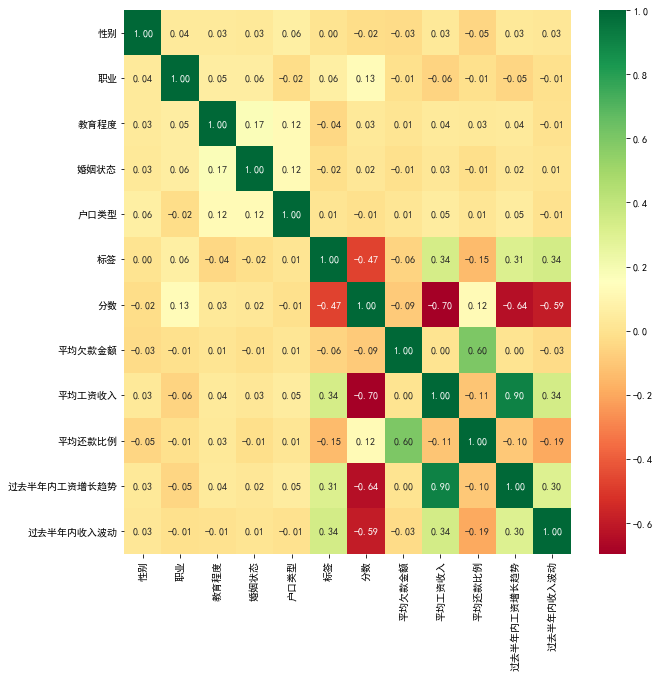

In [21]:
df_corr = df.corr()
plt.figure(figsize=[10, 10])
ax = sns.heatmap(df_corr,
            xticklabels=df_corr.columns,
            yticklabels=df_corr.columns,
            annot = True,
            fmt='.2f',
            cmap ="RdYlGn")

# 单变量预测

In [23]:
feats = ['平均工资收入']
X_train, X_test, Y_train, Y_test = train_test_split(df[feats], df[['分数']], test_size=0.2)
model = LinearRegression()
model.fit(X_train, Y_train)
Y_pred_val = model.predict(X_test)
mse = mean_squared_error(Y_test, Y_pred_val)
print(f'对“分数”列做回归任务，特征数量为 1 个， 均方差:{mse :.4f}')

对“分数”列做回归任务，特征数量为 1 个， 均方差:97.1555


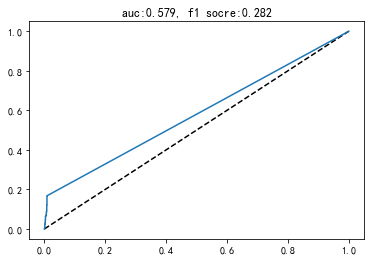

In [24]:
feats = ['平均工资收入']
X_train, X_test, Y_train, Y_test = train_test_split(df[feats], df[['标签']], test_size=0.2)
model = LogisticRegression()
model.fit(X_train, Y_train)
Y_pred = model.predict_proba(X_test)[:, 1]  # 各个测试样本 softmax ，用于计算 roc
Y_pred_lab = model.predict(X_test)  # 各个测试样本预测出的标签
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred)
roc_auc = auc(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.title(f'auc:{roc_auc :.3f}, f1 socre:{f1_score(Y_test, Y_pred_lab) :.3f}')
plt.show()

# pca降维后回归

In [25]:
new_userinfo = pd.get_dummies(df, columns=["性别", "职业", "教育程度", "婚姻状态", "户口类型"])

In [26]:
new_userinfo.head()

,new_user_id,标签,分数,平均欠款金额,平均工资收入,平均还款比例,过去半年内工资增长趋势,过去半年内收入波动,性别_0,性别_1,...,婚姻状态_1,婚姻状态_2,婚姻状态_3,婚姻状态_4,婚姻状态_5,户口类型_0,户口类型_1,户口类型_2,户口类型_3,户口类型_4
0,7259fe272934e0dc348092c37544a445,0,70.260853,0.234447,0.000000,1.004713,0.0,0.000000,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0c87f6b1f7e0350a35841ba34df9d26a,1,22.963381,-11.344397,44.516465,0.779813,1.0,2002.211698,0,1,...,1,0,0,0,0,1,0,0,0,0
2,74c53a62f15cc039864aefc41170f81b,1,33.866533,-4.003015,46.546842,0.919712,0.0,561.297126,0,1,...,1,0,0,0,0,0,1,0,0,0
3,211f56f356fa6ecc6334bb73e52c7b16,0,80.170224,0.000000,0.000000,1.000000,0.0,0.000000,0,1,...,1,0,0,0,0,0,0,1,0,0
4,07b0d9ac7924424894141b2fecfa0ee0,0,73.980588,0.294647,0.000000,1.006083,0.0,0.000000,0,1,...,0,1,0,0,0,1,0,0,0,0


In [27]:
x = new_userinfo.drop(["new_user_id", "标签", "分数"], axis=1)
yr = new_userinfo["分数"]
yc = new_userinfo["标签"]

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, yr, test_size = 0.2, random_state = 77, shuffle = True)
standard = StandardScaler()
x_trs = standard.fit_transform(x_train)
x_tes = standard.transform(x_test)

## 降到5维

In [29]:
pca = PCA(n_components=5)
x_trp = pca.fit_transform(x_trs)
x_tep = pca.transform(x_tes)
print(f'Total Explained Variance: {pca.explained_variance_ratio_.sum() * 100:.2f}%')

Total Explained Variance: 42.86%


Text(0, 0.5, '主成分')

<Figure size 1080x432 with 0 Axes>

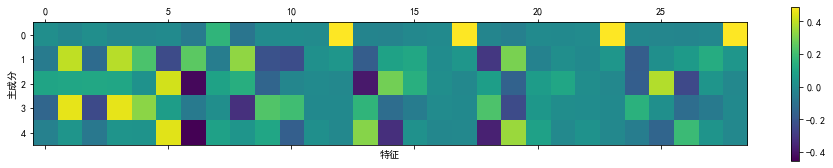

In [30]:
plt.figure(figsize=(15,6))
plt.matshow(pca.components_)
plt.colorbar()
# plt.xticks(range(len(list(x.columns))),x.columns)
plt.xlabel('特征')
plt.ylabel('主成分')

In [28]:
model = LinearRegression()
model.fit(x_trp, y_train)
Y_pred_val = model.predict(x_tep)
mse = mean_squared_error(y_test, Y_pred_val)
print(f'对“分数”列做回归任务， 均方差:{mse :.4f}')

对“分数”列做回归任务， 均方差:93.5036


# 10维

In [31]:
pca = PCA(n_components=10)
x_trp = pca.fit_transform(x_trs)
x_tep = pca.transform(x_tes)
print(f'Total Explained Variance: {pca.explained_variance_ratio_.sum() * 100:.2f}%')

Total Explained Variance: 67.14%


Text(0, 0.5, '主成分')

<Figure size 1080x432 with 0 Axes>

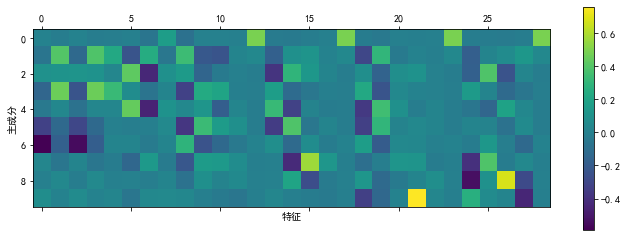

In [33]:
plt.figure(figsize=(15,6))
plt.matshow(pca.components_)
plt.colorbar()
# plt.xticks(range(len(list(x.columns))),x.columns)
plt.xlabel('特征')
plt.ylabel('主成分')

In [31]:
model = LinearRegression()
model.fit(x_trp, y_train)
Y_pred_val = model.predict(x_tep)
mse = mean_squared_error(y_test, Y_pred_val)
print(f'对“分数”列做回归任务， 均方差:{mse :.4f}')

对“分数”列做回归任务， 均方差:80.8349


可以看到，随着维数的增加，特征中包含的信息增多，回归的均方差变小

# 使用pca降维后分类

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, yc, test_size = 0.2, random_state = 77, shuffle = True)
standard = StandardScaler()
x_trs = standard.fit_transform(x_train)
x_tes = standard.transform(x_test)

In [35]:
pca = PCA(n_components=10)
x_trp = pca.fit_transform(x_trs)
x_tep = pca.transform(x_tes)
print(f'Total Explained Variance: {pca.explained_variance_ratio_.sum() * 100:.2f}%')

Total Explained Variance: 67.14%


In [36]:
LogReg = LogisticRegression(random_state=7)
parameters = {'C': [0.1 ,2.0, 5.0, 10.0, 15.0, 20.0]}
log_regressor = GridSearchCV(LogReg, parameters, scoring='neg_mean_squared_error' ,cv =5)
log_regressor.fit(x_trp, y_train)
log_regressor.best_params_

{'C': 2.0}

Text(0, 0.5, '主成分')

<Figure size 1080x432 with 0 Axes>

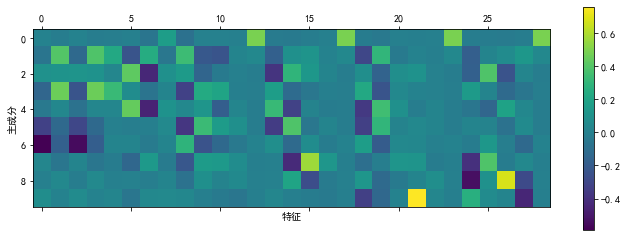

In [38]:
plt.figure(figsize=(15,6))
plt.matshow(pca.components_)
plt.colorbar()
# plt.xticks(range(len(list(x.columns))),x.columns)
plt.xlabel('特征')
plt.ylabel('主成分')

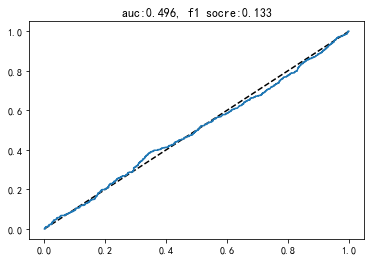

In [36]:
model = LogisticRegression(C=2.0)
model.fit(x_trp, y_train)
Y_pred = model.predict_proba(x_tep)[:, 1]  # 各个测试样本 softmax ，用于计算 roc
Y_pred_lab = model.predict(x_tep)  # 各个测试样本预测出的标签
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred)
roc_auc = auc(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.title(f'auc:{roc_auc :.3f}, f1 socre:{f1_score(Y_test, Y_pred_lab) :.3f}')
plt.show()

In [39]:
pca = PCA(n_components=3)
x_trp = pca.fit_transform(x_trs)
x_tep = pca.transform(x_tes)
print(f'Total Explained Variance: {pca.explained_variance_ratio_.sum() * 100:.2f}%')

Total Explained Variance: 29.88%


Text(0, 0.5, '主成分')

<Figure size 1080x432 with 0 Axes>

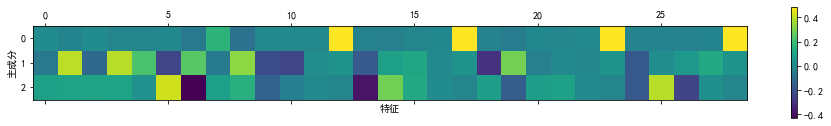

In [40]:
plt.figure(figsize=(15,6))
plt.matshow(pca.components_)
plt.colorbar()
# plt.xticks(range(len(list(x.columns))),x.columns)
plt.xlabel('特征')
plt.ylabel('主成分')

In [39]:
LogReg = LogisticRegression(random_state=7)
parameters = {'C': [0.1 ,2.0, 5.0, 10.0, 15.0, 20.0]}
log_regressor = GridSearchCV(LogReg, parameters, scoring='neg_mean_squared_error' ,cv =5)
log_regressor.fit(x_trp, y_train)
log_regressor.best_params_

{'C': 2.0}

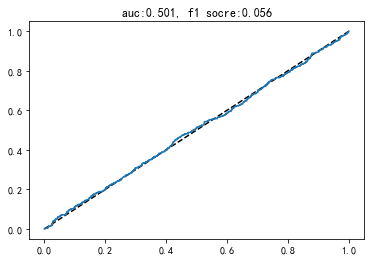

In [40]:
model = LogisticRegression(C=2.0)
model.fit(x_trp, y_train)
Y_pred = model.predict_proba(x_tep)[:, 1]  # 各个测试样本 softmax ，用于计算 roc
Y_pred_lab = model.predict(x_tep)  # 各个测试样本预测出的标签
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred)
roc_auc = auc(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.title(f'auc:{roc_auc :.3f}, f1 socre:{f1_score(Y_test, Y_pred_lab) :.3f}')
plt.show()

ValueError: 'r' is not a valid value for name; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'

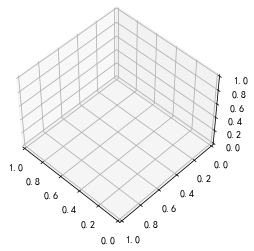

In [43]:
tmp=np.c_[x_trs, y_train]
tmp_1=tmp[tmp[:,3]==0]
tmp_2=tmp[tmp[:,3]==1]
fig = plt.figure(figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

ax.scatter(tmp[:, 0], tmp[:, 1], tmp[:, 2], c=y_train, cmap="spring")

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

降维后两类分开得较为明显